# Calculo eficiente de la función de  autocorrelación

En este notebook se muestran dos alternativas para calcular la función de autocorrelación de una señal, la primera utilizando la forma directa y la segunda con el teorema de Wiener-Khinchin: la autocorrelación de una señal es igual a la transformada de Fourier inversa de su densidad espectral de potencia. Aprovechando la eficiencia de cálculo del algoritmo de FFT, se puede obtener la autocorrelación de manera mucho más rápida utilizando la segunda opción. 

Para revisar con mayor profundidad, ver [este documento](https://www.itp.tu-berlin.de/fileadmin/a3233/grk/pototskyLectures2012/pototsky_lectures_part1.pdf) sobre la función de autocorrelación y el teorema de Wiener-Khinchin.


Para esto creamos una señal determinística a partir de una sinusoide de 440Hz, con una frecuencia de muestreo de 44100Hz y duración 1 segundo. 

In [1]:
# Importamos las librerías que utilizaremos en este ejemplo
import numpy as np
import matplotlib.pyplot as plt
import scipy
import IPython
import time

In [2]:
sr = 44100 # Frecuencia de muestreo
t = np.linspace(0, 1, sr) # Vector de tiempo de 1 segundo
nota = 0.5*np.cos(2*np.pi*t*440) + 0.5*np.cos(2*np.pi*t*880) # Señal determinística

IPython.display.Audio(data=nota, rate=sr) # Escuchamos la señal generada

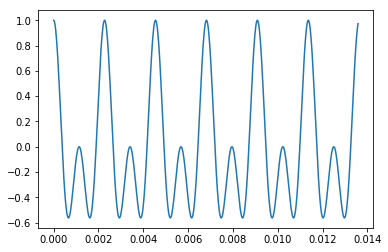

In [3]:
plt.plot(t[0:600], nota[0:600]) # Graficamos una porcion de la señal. Vemos que es periodica puesto que la señal es deterministica y periodica.

Utilizando correlación cruzada se demora 5.187035799026489 segundos


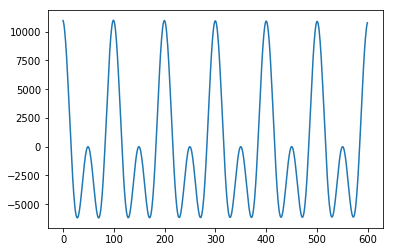

In [4]:
start = time.time() # Tiempo de inicio
xcorr = np.correlate(nota,nota, mode='full') # Calculamos la correlación de la forma directa
end = time.time() # Tiempo de fin
print('Utilizando correlación cruzada se demora {} segundos'.format(end-start))
plt.plot(xcorr[len(nota):len(nota)+600]) # Graficamos una porción de la señal


Utilizando Wiener-Khinchin se demora 0.3048059940338135 segundos


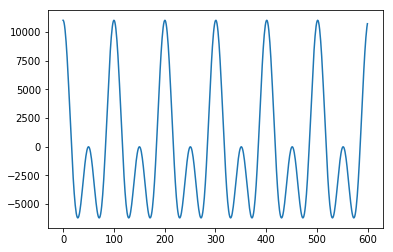

In [5]:
start = time.time()
frec = scipy.fft(nota) # Calculamos la FFT de la señal
S = frec * np.conj(frec) # Calculamos la potencia de la FFT (y por tanto de la señal)
wk_corr = np.real(scipy.ifft(S)) # Siguiendo el teorema de W-K, se calcula la FFT inversa de la densidad espectral de potencia
end = time.time()
print('Utilizando Wiener-Khinchin se demora {} segundos'.format(end-start))
plt.plot(wk_corr[0:600]) # Graficamos una procion de la señal

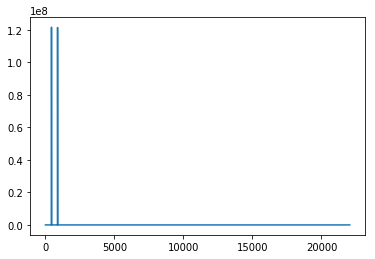

In [6]:
## Graficamos la densidad espectral de potencia de la señal
u = np.linspace(0, sr/2, int(len(nota)/2)) # Siguiendo la regla NUT = 1, generamos vector de bins frecuenciales
plt.plot(u,np.real(S[0:int(len(nota)/2)])) # Solamente mostramos la parte real de la las frecuencias positivas

Como la señal es determinística se puede apreciar la periodicidad de su autocorrelación (a pesar que su amplitud decae). 

Cabe destacar que en en aspectos prácticos, los resultados no son idénticos puesto que una señal real es **finita** y el teorema asume que la señal es **infinita** y que se calcula su densidad espectral de potencia dentro de un intervalo de tiempo infinito. Esto se traduce en que la autocorrelación calculada directamente decae, mientras que la obtenida con el teorema de W-K se mantiene periodica.

Text(0.5,1,'ACF W-K')

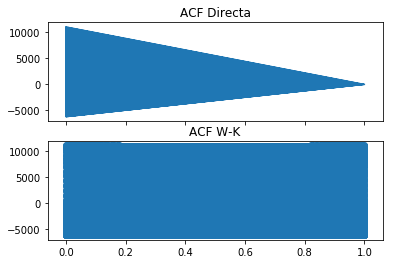

In [7]:
_, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t,xcorr[len(nota)-1:])
axarr[0].set_title('ACF Directa')
axarr[1].scatter(t, wk_corr)
axarr[1].set_title('ACF W-K')
